In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(604, 957, 4)


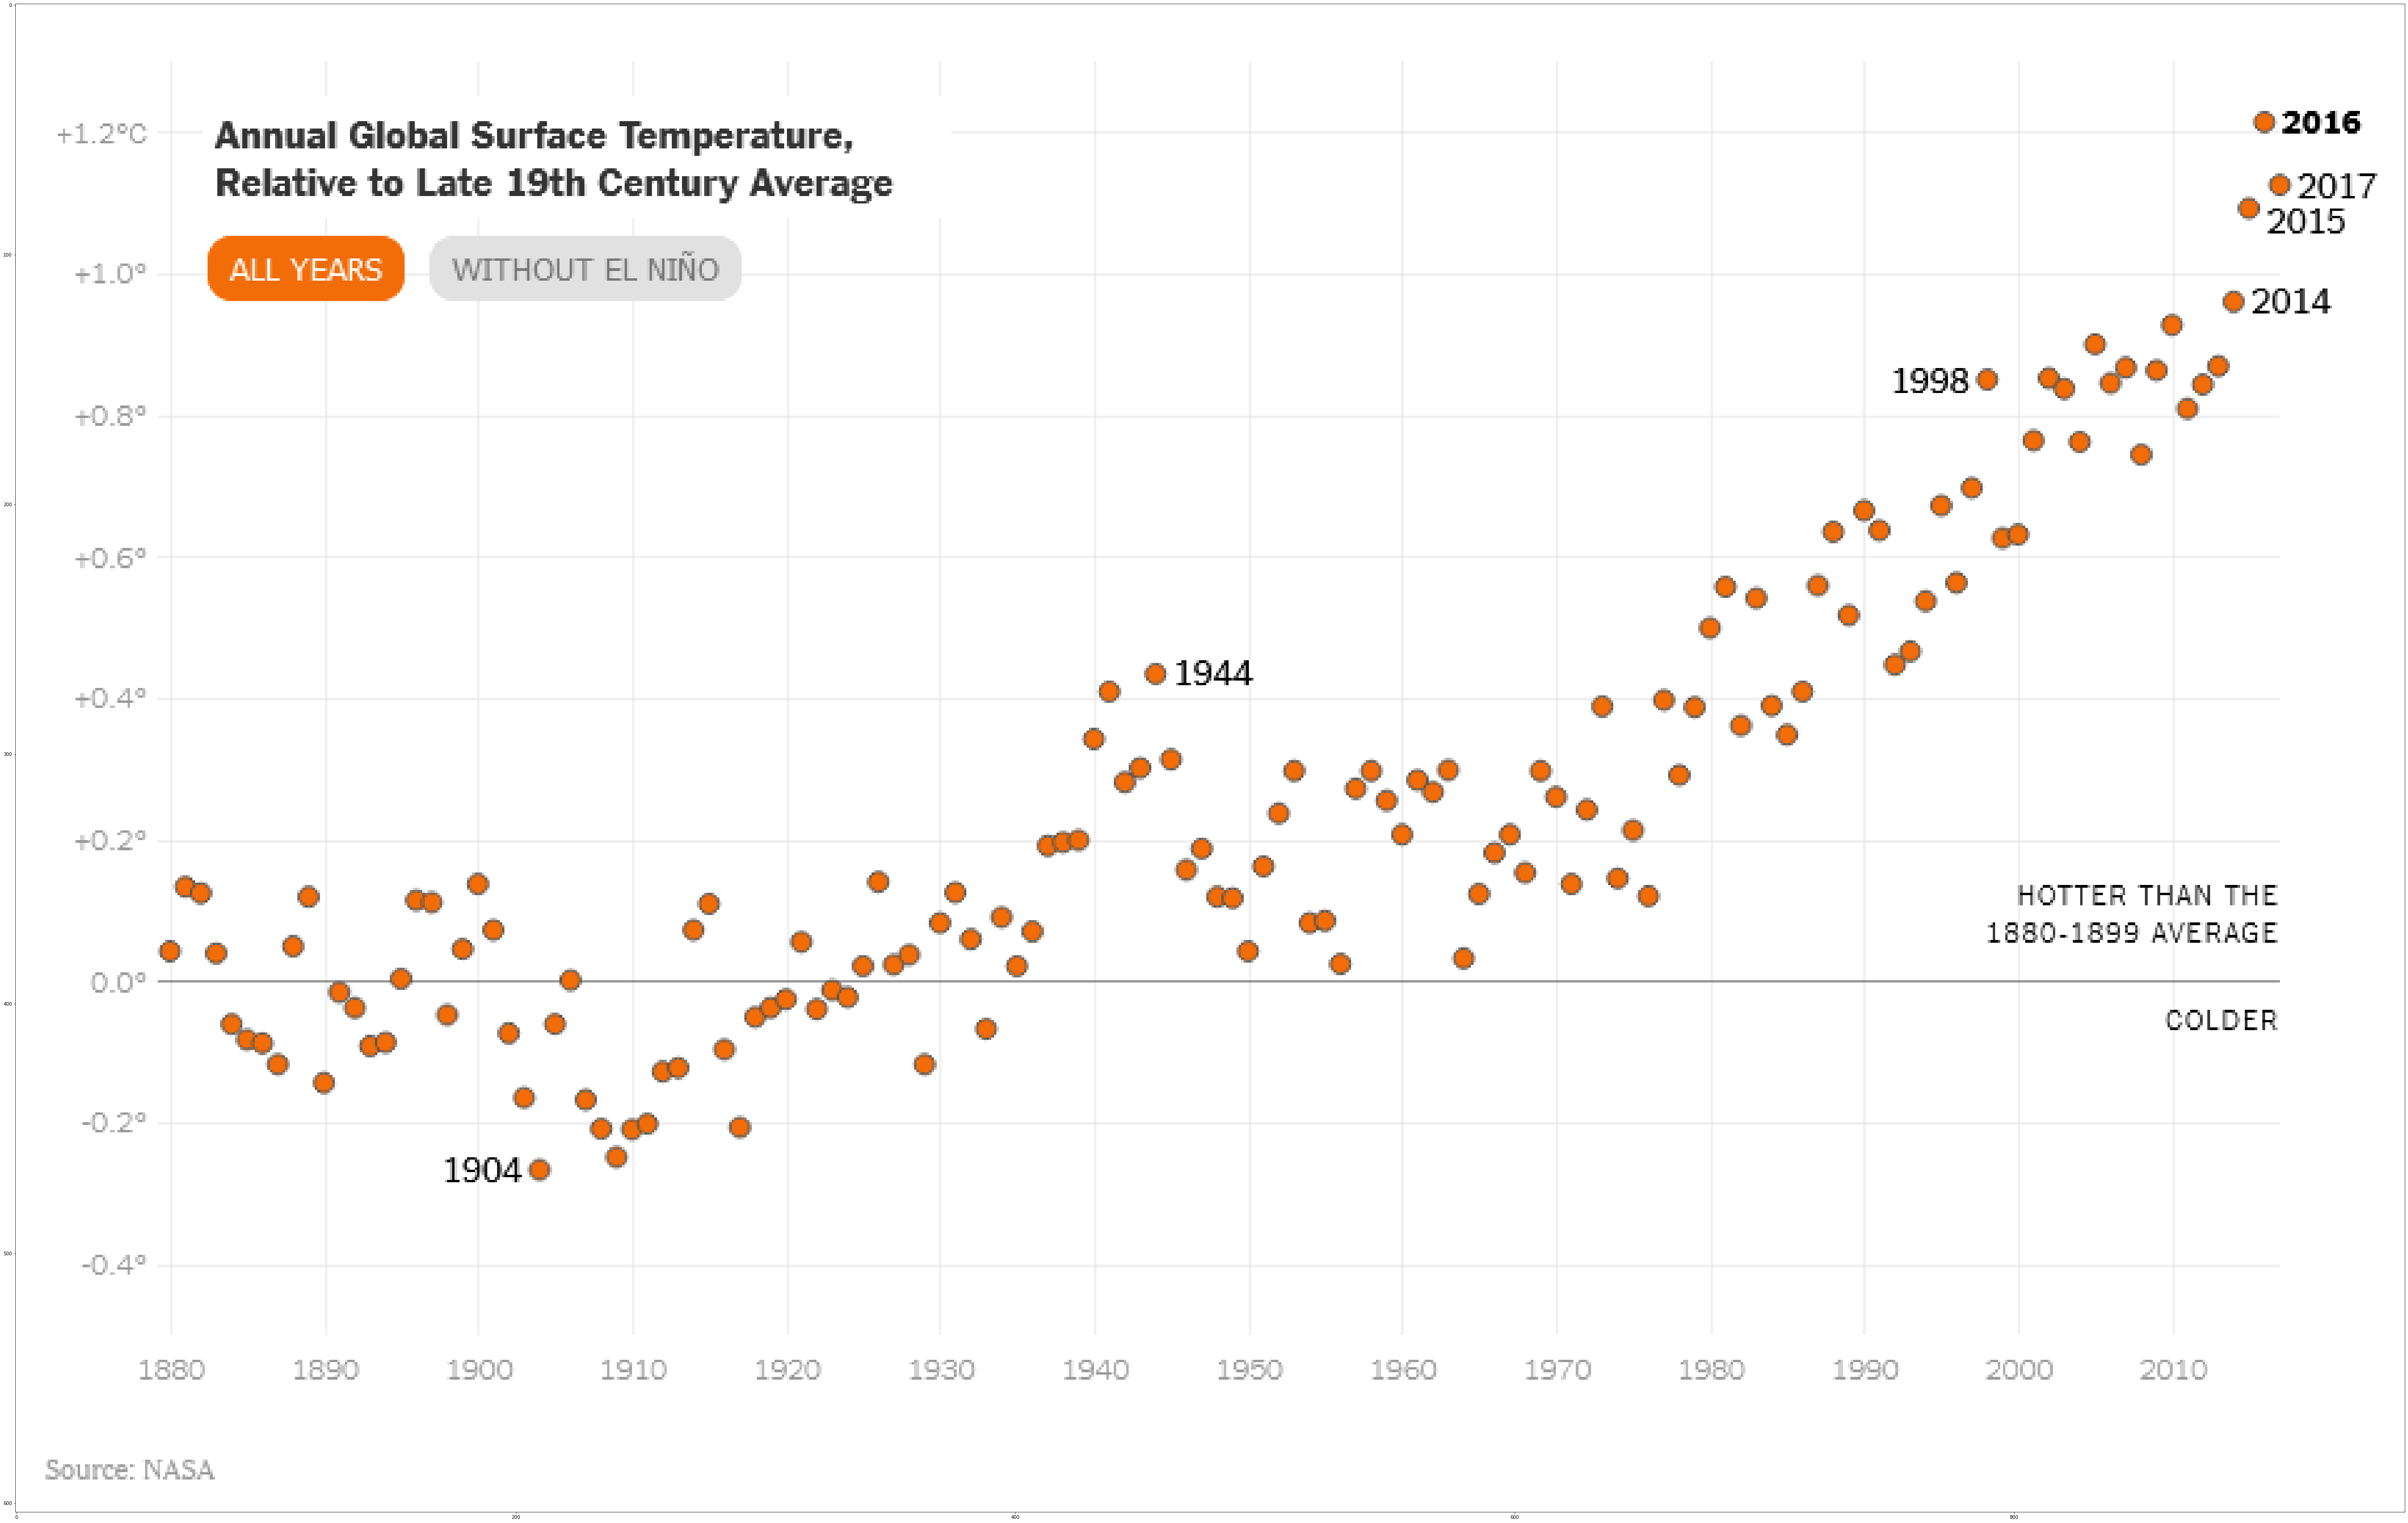

In [2]:
img = mpimg.imread('nyt.png')
print(img.shape)

fig = plt.figure()
fig.set_size_inches(95,60)
plt.imshow(img)


In [3]:
import pandas as pd

In [4]:
temps = pd.read_csv("GLB.Ts_dSST.csv", header=1, usecols=['Year', 'J-D'])
temps.rename(columns={"Year": "year", "J-D": "temp"}, inplace=True)
temps.dropna()

,year,temp
0,1880,-0.19
1,1881,-0.10
2,1882,-0.10
3,1883,-0.19
4,1884,-0.29
...,...,...
133,2013,0.64
134,2014,0.73
135,2015,0.86
136,2016,0.99


In [5]:
# temps.temp = temps.temp * 5/9

In [6]:
temps.head()

,year,temp
0,1880,-0.19
1,1881,-0.10
2,1882,-0.10
3,1883,-0.19
4,1884,-0.29


In [7]:
temps['temp'] -= temps['temp'].head(20).mean()

In [8]:
temps['temp'].head(20).mean()

-1.457167719820518e-17

In [9]:
import altair as alt

In [10]:
chart = alt.Chart(temps).mark_point(fill="#f26c08",color="#6B9892", size=75).encode(
    x = alt.X('year:Q', scale=alt.Scale(domain=[1880, 2020]), axis=alt.Axis(title=None, tickCount=14)),
    y = alt.Y('temp', scale=alt.Scale(domain=[-0.5, 1.3]), axis=alt.Axis(title=None, tickCount=9, labelExpr="if(datum.value > 0, '+', '') + format(datum.value, ',.1f') + '°C'"))
).properties(
    width=957,
    height=604
)

In [11]:
line_data = pd.DataFrame({'temp': [0]})
line = alt.Chart(line_data).mark_rule(color="#404040").encode(y='temp')

In [12]:
labels_r = alt.Chart(temps).transform_filter(
    alt.FieldOneOfPredicate(field = 'year',  oneOf = [1944, 2014, 2015, 2017])
).mark_text(
    align = 'left',
    dx = 9,
    size = 14
    ).encode(
    x = alt.X('year', scale=alt.Scale(domain=[1880, 2020]), axis=alt.Axis(title=None, tickCount=14)),
    y = alt.Y('temp', scale=alt.Scale(domain=[-0.5, 1.3]), axis=alt.Axis(title=None, tickCount=9)),
    text=alt.Text("year:Q")
)

labels_l = alt.Chart(temps).transform_filter(
    alt.FieldOneOfPredicate(field = 'year',  oneOf = [1904, 1998])
).mark_text(
    align = 'right',
    dx = -9,
    size = 14
    ).encode(
    x = alt.X('year', scale=alt.Scale(domain=[1880, 2020]), axis=alt.Axis(title=None, tickCount=14)),
    y = alt.Y('temp', scale=alt.Scale(domain=[-0.5, 1.3]), axis=alt.Axis(title=None, tickCount=9)),
    text=alt.Text("year:Q")
)

labels_b = alt.Chart(temps).transform_filter(
    alt.FieldOneOfPredicate(field = 'year',  oneOf = [2016])
).mark_text(
    align = 'left',
    dx = 9,
    size = 14,
    fontStyle='bold'
    ).encode(
    x = alt.X('year', scale=alt.Scale(domain=[1880, 2020]), axis=alt.Axis(title=None, tickCount=14)),
    y = alt.Y('temp', scale=alt.Scale(domain=[-0.5, 1.3]), axis=alt.Axis(title=None, tickCount=9)),
    text=alt.Text("year:Q")
)

In [13]:
text_line = alt.Chart(temps
).mark_text(x=950, y=390, fontSize = 14, font='Arial', align='right', text=['HOTTER THAN THE','1880-1899 AVERGE','','COLDER']
).encode()

In [14]:
text = alt.Chart(temps
).mark_text(x=10, y=60, fontSize = 18, font='Arial', align='left', text=['Annual Global Surface Temperature,','Relative to Late 19th Century Average']
).encode()
# .configure(background='#D9E9F0')


In [15]:
text_NASA = alt.Chart(temps
).mark_text(x=0, y=644, fontSize = 12, font='Arial', text=['Source: NASA']
).encode()

In [16]:
text_ALL_YEARS = alt.Chart(temps
).mark_text(x=15, y=115, fontSize = 14, font='Arial',  align='left', text=['ALL YEARS']
).encode()

In [17]:
text_WITHOUT = alt.Chart(temps
).mark_text(x=115, y=115, fontSize = 14, font='Arial',  align='left', text=['WITHOUT EL NIÑO']
).encode()

In [18]:
alt.layer(
    chart, 
    line, 
    labels_r, 
    labels_l,
    labels_b, 
    text_line,
    text,
    text_NASA,
    text_ALL_YEARS,
    text_WITHOUT
).configure_view(strokeWidth = 0)

alt.LayerChart(...)